In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from collections import Counter
import tqdm
import codecs
%matplotlib inline

In [3]:
os.listdir('../data')

['neg.txt', 'glove.6B.300d.txt', 'pos.txt']

In [4]:
with codecs.open('../data/pos.txt', 'r') as f:
    pos_text = f.read()

with codecs.open('../data/neg.txt', 'r') as f:
    neg_text = f.read()

In [5]:
print('-'*20 + ' POSITIVE TEXT ' + '-'*20)
pos_sentences = pos_text.lower().split('\n')
sen_len = [len(sentence.split()) for sentence in pos_sentences]
print(f'Total positive sentences: {len(pos_sentences)}')
print(f'The average length of positive sentences: '
      f'{np.mean(sen_len)}')
print(f'The max length of positive sentences: '
      f'{np.max(sen_len)}')
print(f'The min length of positive sentences '
      f'{np.min(sen_len)}')
c = Counter(pos_text.split()).most_common(100)
print(f'Most common words in positive sentences: \n{c}')

print('-'*20 + ' NEGATIVE TEXT ' + '-'*20)
neg_sentences = neg_text.lower().split('\n')
sen_len = [len(sentence.split()) for sentence in neg_sentences]
print(f'Total negative sentences: {len(neg_sentences)}')
print(f'The average length of negative sentences: '
      f'{np.mean(sen_len)}')
print(f'The max length of negative sentences: '
      f'{np.max(sen_len)}')
print(f'The min length of negative sentences '
      f'{np.min(sen_len)}')
c = Counter(neg_text.split()).most_common(100)
print(f'Most common words in negative sentences: \n{c}')

-------------------- POSITIVE TEXT --------------------
Total positive sentences: 5331
The average length of positive sentences: 21.0921027949728
The max length of positive sentences: 59
The min length of positive sentences 2
Most common words in positive sentences: 
[('.', 6972), (',', 5268), ('the', 5051), ('a', 3830), ('and', 3548), ('of', 3311), ('to', 1969), ('is', 1707), ('in', 1338), ('that', 1262), ('it', 1100), ('with', 883), ('as', 879), ('film', 822), ('but', 782), ('an', 754), ('its', 699), ('for', 673), ('this', 666), ("it's", 564), ('movie', 510), ('you', 494), ('on', 424), ('be', 419), ('by', 380), ('has', 379), ('not', 367), ('one', 366), ('at', 366), ('about', 363), ('from', 349), ('are', 348), ('his', 344), ('"', 330), ('--', 319), ('more', 311), ('all', 289), ('than', 282), ('like', 281), ('if', 264), ('have', 259), ('story', 256), ('who', 247), ('most', 240), ('what', 225), ('into', 213), ('so', 209), ('will', 199), ('good', 198), ('comedy', 192), ('or', 189), ('i',

In [6]:
SENTENCE_LIMIT_SIZE = 20

In [7]:
total_text = pos_text + '\n' + neg_text
c = Counter(total_text.split())
sorted(c.most_common(), key=lambda x: x[1])

[("century's", 1),
 ('jean-claud', 1),
 ('segal', 1),
 ('middle-earth', 1),
 ('too-tepid', 1),
 ('showed', 1),
 ('curls', 1),
 ('fed', 1),
 ('ponders', 1),
 ("it'", 1),
 ('enrapturing', 1),
 ('tempt', 1),
 ('inscrutable', 1),
 ('spiderman', 1),
 ('latent', 1),
 ('gangsta', 1),
 ('shook', 1),
 ('rattled', 1),
 ('deceptive', 1),
 ('grimness', 1),
 ('fatalist', 1),
 ('worldview', 1),
 ('lobbies', 1),
 ('two-lane', 1),
 ('roadside', 1),
 ('cafes', 1),
 ('permeate', 1),
 ('bona-fide', 1),
 ('outings', 1),
 ('cartoonlike', 1),
 ('magnet', 1),
 ('co-star', 1),
 ("'compleja", 1),
 ('intelectualmente', 1),
 ('retadora', 1),
 ('ladrón', 1),
 ('orquídeas', 1),
 ('esos', 1),
 ('filmes', 1),
 ('precisamente', 1),
 ('originalidad', 1),
 ('karmen', 1),
 ('chanting', 1),
 ('braided', 1),
 ('wipe', 1),
 ('jeweled', 1),
 ('beads', 1),
 ('lacerating', 1),
 ("'50's", 1),
 ('cheesiness', 1),
 ("johnson's", 1),
 ('orchestrates', 1),
 ('siberian', 1),
 ('sheep', 1),
 ('hosts', 1),
 ('parka-wrapped', 1),
 ('e

In [8]:
vocab = ['<pad>', '<unk>']
for w, f in c.most_common():
    if f > 1:
        vocab.append(w)
print(f'The total size of vocabulary is: {len(vocab)}')

The total size of vocabulary is: 10384


In [9]:
word_to_token = {word: token for token, word in enumerate(vocab)}
token_to_word = {token: word for token, word in enumerate(vocab)}

In [10]:
def convert_text_to_token(sentence, 
                          word_to_token_map=word_to_token,
                          limit_size=SENTENCE_LIMIT_SIZE):
    unk_id = word_to_token_map['<unk>']
    
    tokens = [word_to_token_map.get(word, unk_id) 
              for word in sentence.lower().split()]
    
    if len(tokens) < limit_size:
        tokens.extend([0] * (limit_size - len(tokens)))
    else:
        tokens = tokens[:limit_size]
    
    return tokens

In [11]:
pos_tokens = []

for sentence in tqdm.tqdm(pos_sentences):
    tokens = convert_text_to_token(sentence)
    pos_tokens.append(tokens)

100%|██████████| 5331/5331 [00:00<00:00, 205015.72it/s]


In [13]:
neg_tokens = []

for sentence in tqdm.tqdm(neg_sentences):
    tokens = convert_text_to_token(sentence)
    neg_tokens.append(tokens)

100%|██████████| 5331/5331 [00:00<00:00, 184424.70it/s]


In [14]:
pos_tokens = np.array(pos_tokens)
neg_tokens = np.array(neg_tokens)

In [15]:
total_tokens = np.concatenate((pos_tokens, neg_tokens), axis=0)

In [16]:
print(f'The shape of all tokens in our corpus: {total_tokens.shape}')

The shape of all tokens in our corpus: (10662, 20)


In [17]:
pos_targets = np.ones((pos_tokens.shape[0]))
neg_targets = np.zeros((neg_tokens.shape[0]))

In [18]:
total_targets = np.concatenate((pos_targets, neg_targets), axis=0).reshape(-1, 1)

In [19]:
print(f'The shape of all targets in our corpus: {total_targets.shape}')

The shape of all targets in our corpus: (10662, 1)


In [20]:
with codecs.open('../data/glove.6B.300d.txt', 'r') as f:
    words = set()
    word_to_vec = {}
    lines = f.readlines()
    for line in lines:
        line = line.strip().split()
        curr_word = line[0]
        words.add(curr_word)
        
        word_to_vec[curr_word] = np.array(line[1:], dtype=np.float32)

In [21]:
print(f'The number of words which have '
      f'pretrained-vectors in vocab is: '
      f'{len(set(vocab)&set(words))}')

print(f'The number of words which don`t '
      f'have pretrained-vectors in vocab is: '
      f'{len(set(vocab)) - len(set(vocab)&set(words))}')

The number of words which have pretrained-vectors in vocab is: 9801
The number of words which don`t have pretrained-vectors in vocab is: 583


In [22]:
VOCAB_SIZE = len(vocab) # 10384
EMBEDDING_SIZE = 300

In [23]:
static_embeddings = np.zeros([VOCAB_SIZE, EMBEDDING_SIZE])

for word, token in tqdm.tqdm(word_to_token.items()):
    word_vector = word_to_vec.get(word, 
                                  0.2 * np.random.random(EMBEDDING_SIZE)-0.1)
    static_embeddings[token, :] = word_vector
    
pad_id = word_to_token['<pad>']
static_embeddings[pad_id, :] = np.zeros(EMBEDDING_SIZE)

100%|██████████| 10384/10384 [00:00<00:00, 127484.43it/s]


In [24]:
static_embeddings = static_embeddings.astype(np.float32)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(total_tokens,
                                                    total_targets,
                                                    test_size=0.2,
                                                    random_state=42)

In [26]:
HIDDEN_SIZE = 512
LEARNING_RATE = 0.001
EPOCHES = 50
BATCH_SIZE = 256

def get_batch(x, y, batch_size=BATCH_SIZE, shuffle=True):
    assert x.shape[0] == y.shape[0], print('error shape!')
    
    if shuffle:
        shuffle_index = np.random.permutation(range(x.shape[0]))
        
        x = x[shuffle_index]
        y = y[shuffle_index]
    
    n_batches = int(x.shape[0] / batch_size)
    for i in range(n_batches-1):
        x_batch = x[i*batch_size: (i+1)*batch_size]
        y_batch = y[i*batch_size: (i+1)*batch_size]
        
        yield x_batch, y_batch

In [27]:
tf.reset_default_graph()

In [28]:
with tf.name_scope('dnn'):
    with tf.name_scope('placeholders'):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name='inputs')
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='targets')
    with tf.name_scope('embeddings'):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False,
                                       name='embedding_matrix')
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name='embed')
        sum_embed = tf.reduce_sum(embed, axis=1, name='sum_embed')
        
    with tf.name_scope('model'):
        W1 = tf.Variable(tf.random_normal(shape=(EMBEDDING_SIZE, HIDDEN_SIZE),
                                          stddev=0.1),
                         name='W1')
        b1 = tf.Variable(tf.zeros(shape=(HIDDEN_SIZE), name='b1'))
        
        W2 = tf.Variable(tf.random_normal(shape=(HIDDEN_SIZE, 1), stddev=0.1), name='W2')
        b2 = tf.Variable(tf.zeros(shape=(1), name='b2'))
        
        z1 = tf.add(tf.matmul(sum_embed, W1), b1)
        a1 = tf.nn.relu(z1)
        
        logits = tf.add(tf.matmul(a1, W2), b2)
        outputs = tf.nn.sigmoid(logits, name='outputs')
        
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
    
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    with tf.name_scope('evaluation'):
        correct_preds = tf.equal(tf.cast(tf.greater(outputs, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

In [33]:
dnn_train_accuracy = []
dnn_test_accuracy = []
saver = tf.train.Saver()

In [34]:
import time

start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('../graphs/dnn', tf.get_default_graph())
    
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        
        for x_batch, y_batch in get_batch(x_train, y_train):
            _, batch_loss = sess.run([optimizer, loss], 
                                     feed_dict={inputs: x_batch, targets: y_batch})
            
            total_loss += batch_loss
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train, targets: y_train})
        train_acc = train_corrects / x_train.shape[0]
        dnn_train_accuracy.append(train_acc)
        
        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test, targets: y_test})
        test_acc = test_corrects / x_test.shape[0]
        dnn_test_accuracy.append(test_acc)
        
        print(f'Epoch: {epoch+1}, Train loss: {total_loss/n_batches:.4f}, '
              f'Train accuracy: {train_acc:.4%}, Test accuracy: {test_acc:.4%}')
    
    saver.save(sess, '../checkpoints/dnn')
    writer.close()
end = time.time()
print(f'training time: {(end-start):.4f}s')

Epoch: 1, Train loss: 1.0877, Train accuracy: 69.0820%, Test accuracy: 66.8073%
Epoch: 2, Train loss: 0.6078, Train accuracy: 72.8456%, Test accuracy: 70.3704%
Epoch: 3, Train loss: 0.5351, Train accuracy: 75.3781%, Test accuracy: 70.1360%
Epoch: 4, Train loss: 0.5181, Train accuracy: 75.9526%, Test accuracy: 69.9484%
Epoch: 5, Train loss: 0.4780, Train accuracy: 78.5672%, Test accuracy: 69.6203%
Epoch: 6, Train loss: 0.4430, Train accuracy: 79.7749%, Test accuracy: 70.8861%
Epoch: 7, Train loss: 0.4198, Train accuracy: 81.6977%, Test accuracy: 71.8706%
Epoch: 8, Train loss: 0.4143, Train accuracy: 81.8736%, Test accuracy: 71.2611%
Epoch: 9, Train loss: 0.3793, Train accuracy: 84.9924%, Test accuracy: 71.3549%
Epoch: 10, Train loss: 0.3647, Train accuracy: 85.3089%, Test accuracy: 71.4487%
Epoch: 11, Train loss: 0.3335, Train accuracy: 87.9236%, Test accuracy: 70.8392%
Epoch: 12, Train loss: 0.3044, Train accuracy: 89.3657%, Test accuracy: 71.5424%
Epoch: 13, Train loss: 0.2841, Train 

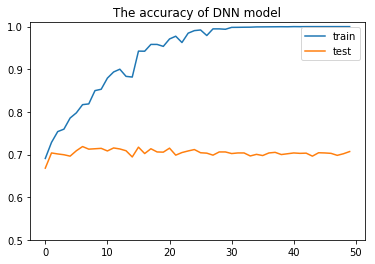

In [35]:
plt.plot(dnn_train_accuracy)
plt.plot(dnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title('The accuracy of DNN model')
plt.legend(['train', 'test'])

In [36]:
with tf.Session() as sess:
    saver.restore(sess, '../checkpoints/dnn')
    
    total_correct = 0
    acc = sess.run(accuracy, feed_dict={inputs: x_test,
                                        targets: y_test})
    total_correct += acc
    print(f'The DNN model accuracy on test set: {total_correct/x_test.shape[0]:.4%}')

INFO:tensorflow:Restoring parameters from ../checkpoints/dnn
The DNN model accuracy on test set: 70.6985%


In [37]:
tf.reset_default_graph()

In [38]:
KEEP_PROB = 0.5

In [39]:
with tf.name_scope('rnn'):
    with tf.name_scope('placeholders'):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name='inputs')
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='targets')
    with tf.name_scope('embeddings'):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False,
                                       name='embedding_matrix')
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name='embed')
        
    with tf.name_scope('model'):
        lstm = tf.nn.rnn_cell.LSTMCell(HIDDEN_SIZE, 
                                       initializer=tf.random_uniform_initializer(-0.1, 
                                                                                 0.1, 
                                                                                 seed=123))
        drop_lstm = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=KEEP_PROB)
        _, lstm_state = tf.nn.dynamic_rnn(drop_lstm, embed, dtype=tf.float32)
        
        W = tf.Variable(tf.truncated_normal(shape=(HIDDEN_SIZE, 1), mean=0.0, stddev=0.1), name='W')
        b = tf.Variable(tf.zeros(shape=(1)), name='b')
        
        logits = tf.add(tf.matmul(lstm_state.h, W), b)
        outputs = tf.nn.sigmoid(logits, name='outputs')
        
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
    
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    with tf.name_scope('evaluation'):
        correct_preds = tf.equal(tf.cast(tf.greater(outputs, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

In [40]:
rnn_train_accuracy = []
rnn_test_accuracy = []
saver = tf.train.Saver()

In [41]:
start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('../graphs/rnn', tf.get_default_graph())
    
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        
        for x_batch, y_batch in get_batch(x_train, y_train):
            _, batch_loss = sess.run([optimizer, loss], 
                                     feed_dict={inputs: x_batch, targets: y_batch})
            
            total_loss += batch_loss
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train, targets: y_train})
        train_acc = train_corrects / x_train.shape[0]
        rnn_train_accuracy.append(train_acc)
        
        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test, targets: y_test})
        test_acc = test_corrects / x_test.shape[0]
        rnn_test_accuracy.append(test_acc)
        
        print(f'Epoch: {epoch+1}, Train loss: {total_loss/n_batches:.4f}, '
              f'Train accuracy: {train_acc:.4%}, Test accuracy: {test_acc:.4%}')
    
    saver.save(sess, '../checkpoints/rnn')
    writer.close()
end = time.time()
print(f'training time: {(end-start):.4f}s')

Epoch: 1, Train loss: 0.6448, Train accuracy: 72.5876%, Test accuracy: 69.8547%
Epoch: 2, Train loss: 0.5015, Train accuracy: 75.9995%, Test accuracy: 73.0895%
Epoch: 3, Train loss: 0.4600, Train accuracy: 77.8989%, Test accuracy: 72.1519%
Epoch: 4, Train loss: 0.4166, Train accuracy: 83.5033%, Test accuracy: 74.1678%
Epoch: 5, Train loss: 0.3694, Train accuracy: 86.4462%, Test accuracy: 73.8865%
Epoch: 6, Train loss: 0.3339, Train accuracy: 88.0643%, Test accuracy: 72.6207%
Epoch: 7, Train loss: 0.2678, Train accuracy: 93.0238%, Test accuracy: 73.6521%
Epoch: 8, Train loss: 0.1963, Train accuracy: 94.2783%, Test accuracy: 72.8551%
Epoch: 9, Train loss: 0.1654, Train accuracy: 93.3638%, Test accuracy: 70.8861%
Epoch: 10, Train loss: 0.1202, Train accuracy: 97.9482%, Test accuracy: 73.5115%
Epoch: 11, Train loss: 0.0728, Train accuracy: 98.3703%, Test accuracy: 72.2925%
Epoch: 12, Train loss: 0.0605, Train accuracy: 99.0034%, Test accuracy: 72.4332%
Epoch: 13, Train loss: 0.0648, Train 

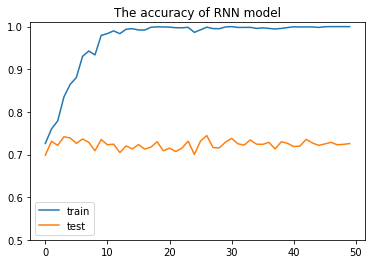

In [42]:
plt.plot(rnn_train_accuracy)
plt.plot(rnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title('The accuracy of RNN model')
plt.legend(['train', 'test'])

In [43]:
with tf.Session() as sess:
    saver.restore(sess, '../checkpoints/rnn')
    
    total_correct = 0
    acc = sess.run(accuracy, feed_dict={inputs: x_test,
                                        targets: y_test})
    total_correct += acc
    print(f'The RNN model accuracy on test set: {total_correct/x_test.shape[0]:.4%}')

INFO:tensorflow:Restoring parameters from ../checkpoints/rnn
The RNN model accuracy on test set: 72.5738%


In [60]:
tf.reset_default_graph()

In [61]:
filters_size = [2, 3, 4, 5, 6]
num_filters = 100
# 超参数
BATCH_SIZE = 256
EPOCHES = 100
LEARNING_RATE = 0.001
L2_LAMBDA = 10
KEEP_PROB = 0.8

In [62]:
with tf.name_scope('cnn'):
    with tf.name_scope('placeholders'):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name='inputs')
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='targets')
        
    with tf.name_scope('embeddings'):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False,
                                       name='embedding_matrix')
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name='embed')
        embed_expanded = tf.expand_dims(embed, -1, name='embed_expand')
    
    pooled_outputs = []
        
    for i, filter_size in enumerate(filters_size):
        with tf.name_scope(f'conv_maxpool_{filter_size}'):
            filter_shape = [filter_size, EMBEDDING_SIZE, 1, num_filters]
            W = tf.Variable(tf.truncated_normal(filter_shape, mean=0.0, stddev=0.1), name='W')
            b = tf.Variable(tf.zeros(num_filters), name='b')
            
            conv = tf.nn.conv2d(input=embed_expanded,
                                filter=W,
                                strides=[1,1,1,1],
                                padding='VALID',
                                name='conv')
            a = tf.nn.relu(tf.nn.bias_add(conv, b), name='activations')
            max_pooling = tf.nn.max_pool(value=a,
                                         ksize=[1, SENTENCE_LIMIT_SIZE - filter_size + 1, 1, 1],
                                         strides=[1, 1, 1, 1],
                                         padding='VALID',
                                         name='max_pooling')
            pooled_outputs.append(max_pooling)
    
    total_filters = num_filters * len(filters_size)
    total_pool = tf.concat(pooled_outputs, 3)
    flattend_pool = tf.reshape(total_pool, (-1, total_filters))
    
    with tf.name_scope('dropout'):
        dropout = tf.nn.dropout(flattend_pool, KEEP_PROB)
    
    with tf.variable_scope('output'):
        W = tf.get_variable('W', shape=(total_filters, 1), 
                            initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(1), name='b')
        
        logits = tf.add(tf.matmul(dropout, W), b)
        predictions = tf.nn.sigmoid(logits, name='predictions')
    
        
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
        loss = loss + L2_LAMBDA * tf.nn.l2_loss(W)
    
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    with tf.name_scope('evaluation'):
        correct_preds = tf.equal(tf.cast(tf.greater(predictions, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

In [63]:
cnn_train_accuracy = []
cnn_test_accuracy = []
saver = tf.train.Saver()

In [64]:
start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('../graphs/cnn', tf.get_default_graph())
    
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        
        for x_batch, y_batch in get_batch(x_train, y_train):
            _, batch_loss = sess.run([optimizer, loss], 
                                     feed_dict={inputs: x_batch, targets: y_batch})
            
            total_loss += batch_loss
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train, targets: y_train})
        train_acc = train_corrects / x_train.shape[0]
        cnn_train_accuracy.append(train_acc)
        
        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test, targets: y_test})
        test_acc = test_corrects / x_test.shape[0]
        cnn_test_accuracy.append(test_acc)
        
        print(f'Epoch: {epoch+1}, Train loss: {total_loss/n_batches:.4f}, '
              f'Train accuracy: {train_acc:.4%}, Test accuracy: {test_acc:.4%}')
    
    saver.save(sess, '../checkpoints/cnn')
    writer.close()
end = time.time()
print(f'training time: {(end-start):.4f}s')

Epoch: 1, Train loss: 7.2215, Train accuracy: 71.7083%, Test accuracy: 65.4477%
Epoch: 2, Train loss: 2.8657, Train accuracy: 76.6913%, Test accuracy: 69.0108%
Epoch: 3, Train loss: 1.2688, Train accuracy: 76.8203%, Test accuracy: 69.7609%
Epoch: 4, Train loss: 0.7770, Train accuracy: 77.7817%, Test accuracy: 71.1205%
Epoch: 5, Train loss: 0.6475, Train accuracy: 77.5237%, Test accuracy: 71.8706%
Epoch: 6, Train loss: 0.6073, Train accuracy: 77.4299%, Test accuracy: 72.5270%
Epoch: 7, Train loss: 0.5851, Train accuracy: 75.8471%, Test accuracy: 71.0736%
Epoch: 8, Train loss: 0.5692, Train accuracy: 76.9375%, Test accuracy: 72.1050%
Epoch: 9, Train loss: 0.5570, Train accuracy: 78.0514%, Test accuracy: 72.7145%
Epoch: 10, Train loss: 0.5463, Train accuracy: 78.0865%, Test accuracy: 72.6207%
Epoch: 11, Train loss: 0.5362, Train accuracy: 78.6376%, Test accuracy: 73.1364%
Epoch: 12, Train loss: 0.5286, Train accuracy: 79.1535%, Test accuracy: 73.5584%
Epoch: 13, Train loss: 0.5223, Train 

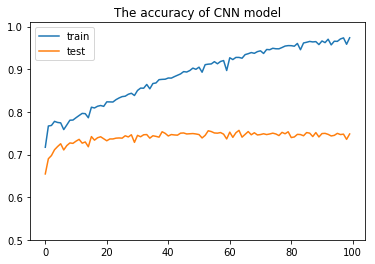

In [65]:
plt.plot(cnn_train_accuracy)
plt.plot(cnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title('The accuracy of CNN model')
plt.legend(['train', 'test'])

In [66]:
with tf.Session() as sess:
    saver.restore(sess, '../checkpoints/cnn')
    
    total_correct = sess.run(accuracy,
                             feed_dict={inputs: x_test, targets: y_test})

    print(f'The LSTM model accuracy on test set: {(total_correct / x_test.shape[0]):.2%}')

INFO:tensorflow:Restoring parameters from ../checkpoints/cnn
The LSTM model accuracy on test set: 74.07%


In [83]:
tf.reset_default_graph()

In [84]:
filters_size = [2, 3, 4, 5, 6]
num_filters = 100
# 超参数
BATCH_SIZE = 256
EPOCHES = 10
LEARNING_RATE = 0.001
L2_LAMBDA = 10
KEEP_PROB = 0.8

In [85]:
with tf.name_scope('cnn_multichannels'):
    with tf.name_scope('placeholders'):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name='inputs')
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='targets')
        
    with tf.name_scope('embeddings'):
        static_embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False,
                                       name='embedding_matrix')
        static_embed = tf.nn.embedding_lookup(static_embedding_matrix, inputs, name='embed')
        static_embed_expanded = tf.expand_dims(static_embed, -1, name='static_embed_expand')
        
        # non-static embeddings
        dynamic_embedding_matrix = tf.Variable(tf.random_normal(shape=(VOCAB_SIZE,
                                                                       EMBEDDING_SIZE),
                                                                stddev=0.1),
                                               trainable=True,
                                               name='dynamic_embedding_matrix')
        dynamic_embed = tf.nn.embedding_lookup(dynamic_embedding_matrix, 
                                               inputs, 
                                               name='dynamic_embed')
        dynamic_embed_expanded = tf.expand_dims(dynamic_embed, -1, 
                                                name='dynamic_embed_expand')
        embed_expanded = tf.concat((static_embed_expanded, 
                                    dynamic_embed_expanded),
                                   axis=-1,
                                   name='embed_expanded')
    
    pooled_outputs = []
        
    for i, filter_size in enumerate(filters_size):
        with tf.name_scope(f'conv_maxpool_{filter_size}'):
            filter_shape = [filter_size, EMBEDDING_SIZE, 2, num_filters]
            W = tf.Variable(tf.truncated_normal(filter_shape, mean=0.0, stddev=0.1), name='W')
            b = tf.Variable(tf.zeros(num_filters), name='b')
            
            conv = tf.nn.conv2d(input=embed_expanded,
                                filter=W,
                                strides=[1,1,1,1],
                                padding='VALID',
                                name='conv')
            a = tf.nn.relu(tf.nn.bias_add(conv, b), name='activations')
            max_pooling = tf.nn.max_pool(value=a,
                                         ksize=[1, SENTENCE_LIMIT_SIZE-filter_size+1, 1, 1],
                                         strides=[1, 1, 1, 1],
                                         padding='VALID',
                                         name='max_pooling')
            pooled_outputs.append(max_pooling)
    
    total_filters = num_filters * len(filters_size)
    total_pool = tf.concat(pooled_outputs, 3)
    flattend_pool = tf.reshape(total_pool, (-1, total_filters))
    
    with tf.name_scope('dropout'):
        dropout = tf.nn.dropout(flattend_pool, KEEP_PROB)
    
    with tf.variable_scope('output'):
        W = tf.get_variable('W', shape=(total_filters, 1), 
                            initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(1), name='b')
        
        logits = tf.add(tf.matmul(dropout, W), b)
        predictions = tf.nn.sigmoid(logits, name='predictions')
    
        
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, 
                                                                      logits=logits))
        loss = loss + L2_LAMBDA * tf.nn.l2_loss(W)
    
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    with tf.name_scope('evaluation'):
        correct_preds = tf.equal(tf.cast(tf.greater(predictions, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

In [90]:
multi_cnn_train_accuracy = []
multi_cnn_test_accuracy = []

In [91]:
saver = tf.train.Saver()

In [92]:
start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('../graphs/multi_cnn', tf.get_default_graph())
    
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        
        for x_batch, y_batch in get_batch(x_train, y_train):
            _, batch_loss = sess.run([optimizer, loss], 
                                     feed_dict={inputs: x_batch, targets: y_batch})
            
            total_loss += batch_loss
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train, targets: y_train})
        train_acc = train_corrects / x_train.shape[0]
        multi_cnn_train_accuracy.append(train_acc)
        
        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test, targets: y_test})
        test_acc = test_corrects / x_test.shape[0]
        multi_cnn_test_accuracy.append(test_acc)
        
        print(f'Epoch: {epoch+1}, Train loss: {total_loss/n_batches:.4f}, '
              f'Train accuracy: {train_acc:.4%}, Test accuracy: {test_acc:.4%}')
    
    saver.save(sess, '../checkpoints/multi_cnn')
    writer.close()
end = time.time()
print(f'training time: {(end-start):.4f}s')

Epoch: 1, Train loss: 7.2252, Train accuracy: 74.9443%, Test accuracy: 66.5260%
Epoch: 2, Train loss: 2.8851, Train accuracy: 82.0026%, Test accuracy: 67.6981%
Epoch: 3, Train loss: 1.2689, Train accuracy: 84.5117%, Test accuracy: 69.8078%
Epoch: 4, Train loss: 0.7627, Train accuracy: 84.6875%, Test accuracy: 70.2297%
Epoch: 5, Train loss: 0.6237, Train accuracy: 84.7579%, Test accuracy: 72.4332%
Epoch: 6, Train loss: 0.5689, Train accuracy: 84.5820%, Test accuracy: 73.6990%
Epoch: 7, Train loss: 0.5305, Train accuracy: 85.7779%, Test accuracy: 73.6990%
Epoch: 8, Train loss: 0.4897, Train accuracy: 86.9739%, Test accuracy: 74.4960%
Epoch: 9, Train loss: 0.4474, Train accuracy: 89.5650%, Test accuracy: 74.7773%
Epoch: 10, Train loss: 0.4059, Train accuracy: 90.9251%, Test accuracy: 73.8865%
training time: 7.9128s


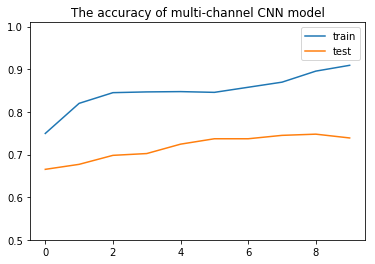

In [93]:
plt.plot(multi_cnn_train_accuracy)
plt.plot(multi_cnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title('The accuracy of multi-channel CNN model')
plt.legend(['train', 'test'])

In [95]:
with tf.Session() as sess:
    saver.restore(sess, '../checkpoints/multi_cnn')
    
    total_correct = sess.run(accuracy,
                             feed_dict={inputs: x_test, targets: y_test})

    print(f'The LSTM model accuracy on test set: {(total_correct / x_test.shape[0]):.2%}')

INFO:tensorflow:Restoring parameters from ../checkpoints/multi_cnn
The LSTM model accuracy on test set: 74.50%
